# Rede Neural Mega Sena

## Importando Bibliotecas

In [38]:
import pandas              as pd
import numpy               as np
import matplotlib.pyplot   as plt
import seaborn             as sns
import missingno           as msno
import numpy               as np

%matplotlib inline

pd.set_option('display.max_columns',500)

## Carregando o Dataset

In [39]:
df = pd.read_csv('mega_sena_ate_concurso_2109_sorteio.csv', delimiter=';', )
df.head()

,Concurso,Data Sorteio,primeira_dezena,segunda_dezena,terceira_dezena,quarta_dezena,quinta_dezena,sexta_dezena,Arrecadacao_Total,Ganhadores_Sena,Cidade,UF,Rateio_Sena,Ganhadores_Quina,Rateio_Quina,Ganhadores_Quadra,Rateio_Quadra,Acumulado,Valor_Acumulado,Estimativa_Prêmio,Acumulado_Mega_da_Virada
0,1.0,11/3/1996,41.0,5.0,4.0,52.0,30.0,33.0,0,0.0,NaN,NaN,0,17.0,"39.158,92",2016.0,"330,21",SIM,"1.714.650,23",0,0
1,2.0,18/03/1996,9.0,39.0,37.0,49.0,43.0,41.0,0,1.0,NaN,PR,"2.307.162,23",65.0,"14.424,02",4488.0,"208,91",NÃO,0,0,0
2,3.0,25/03/1996,36.0,30.0,10.0,11.0,29.0,47.0,0,2.0,NaN,RN,"391.192,51",62.0,"10.515,93",4261.0,"153,01",NÃO,0,0,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,1/4/1996,6.0,59.0,42.0,27.0,1.0,5.0,0,0.0,NaN,NaN,0,39.0,"15.322,24",3311.0,"180,48",SIM,"717.080,75",0,0


## Check Dataset

In [40]:
df.shape

(2326, 21)

In [41]:
df.dtypes

Concurso                    float64
Data Sorteio                 object
primeira_dezena             float64
segunda_dezena              float64
terceira_dezena             float64
quarta_dezena               float64
quinta_dezena               float64
sexta_dezena                float64
Arrecadacao_Total            object
Ganhadores_Sena             float64
Cidade                       object
UF                           object
Rateio_Sena                  object
Ganhadores_Quina            float64
Rateio_Quina                 object
Ganhadores_Quadra           float64
Rateio_Quadra                object
Acumulado                    object
Valor_Acumulado              object
Estimativa_Prêmio            object
Acumulado_Mega_da_Virada     object
dtype: object

## Transformação de Dados

In [42]:
# Criar coluna do datafile para converter a data para datetime
df['data_sorteio_conv'] = df.iloc[:,1]
df.data_sorteio_conv = pd.to_datetime(df.data_sorteio_conv)

# Vamos quebrar a data em Dia, Mês e Ano
df['day']   = df.data_sorteio_conv.dt.day
df['month'] = df.data_sorteio_conv.dt.month 
df['year']  = df.data_sorteio_conv.dt.year

In [43]:
df.head()

,Concurso,Data Sorteio,primeira_dezena,segunda_dezena,terceira_dezena,quarta_dezena,quinta_dezena,sexta_dezena,Arrecadacao_Total,Ganhadores_Sena,Cidade,UF,Rateio_Sena,Ganhadores_Quina,Rateio_Quina,Ganhadores_Quadra,Rateio_Quadra,Acumulado,Valor_Acumulado,Estimativa_Prêmio,Acumulado_Mega_da_Virada,data_sorteio_conv,day,month,year
0,1.0,11/3/1996,41.0,5.0,4.0,52.0,30.0,33.0,0,0.0,NaN,NaN,0,17.0,"39.158,92",2016.0,"330,21",SIM,"1.714.650,23",0,0,1996-11-03,3.0,11.0,1996.0
1,2.0,18/03/1996,9.0,39.0,37.0,49.0,43.0,41.0,0,1.0,NaN,PR,"2.307.162,23",65.0,"14.424,02",4488.0,"208,91",NÃO,0,0,0,1996-03-18,18.0,3.0,1996.0
2,3.0,25/03/1996,36.0,30.0,10.0,11.0,29.0,47.0,0,2.0,NaN,RN,"391.192,51",62.0,"10.515,93",4261.0,"153,01",NÃO,0,0,0,1996-03-25,25.0,3.0,1996.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
4,4.0,1/4/1996,6.0,59.0,42.0,27.0,1.0,5.0,0,0.0,NaN,NaN,0,39.0,"15.322,24",3311.0,"180,48",SIM,"717.080,75",0,0,1996-01-04,4.0,1.0,1996.0


In [44]:
# Vamos criar um dataframe para analisar os sorteios que tiveram ganhadores
df_ganhadores = df[df['Acumulado'] == 'NÃO']
df_ganhadores.head()

,Concurso,Data Sorteio,primeira_dezena,segunda_dezena,terceira_dezena,quarta_dezena,quinta_dezena,sexta_dezena,Arrecadacao_Total,Ganhadores_Sena,Cidade,UF,Rateio_Sena,Ganhadores_Quina,Rateio_Quina,Ganhadores_Quadra,Rateio_Quadra,Acumulado,Valor_Acumulado,Estimativa_Prêmio,Acumulado_Mega_da_Virada,data_sorteio_conv,day,month,year
1,2.0,18/03/1996,9.0,39.0,37.0,49.0,43.0,41.0,0,1.0,NaN,PR,"2.307.162,23",65.0,"14.424,02",4488.0,"208,91",NÃO,0,0,0,1996-03-18,18.0,3.0,1996.0
2,3.0,25/03/1996,36.0,30.0,10.0,11.0,29.0,47.0,0,2.0,NaN,RN,"391.192,51",62.0,"10.515,93",4261.0,"153,01",NÃO,0,0,0,1996-03-25,25.0,3.0,1996.0
11,11.0,20/05/1996,25.0,15.0,58.0,37.0,59.0,38.0,0,1.0,NaN,RJ,"15.591.365,07",148.0,"12.706,05",9442.0,"199,16",NÃO,0,0,0,1996-05-20,20.0,5.0,1996.0
17,17.0,1/7/1996,10.0,20.0,6.0,19.0,51.0,13.0,0,1.0,NaN,SP,"6.789.869,08",144.0,"7.628,37",9376.0,"117,16",NÃO,0,0,0,1996-01-07,7.0,1.0,1996.0
24,24.0,19/08/1996,1.0,8.0,14.0,28.0,33.0,43.0,0,1.0,NaN,NaN,"18.661.679,61",227.0,"7.897,31",13486.0,"132,93",NÃO,0,0,0,1996-08-19,19.0,8.0,1996.0


## Higienizando nosso dataset

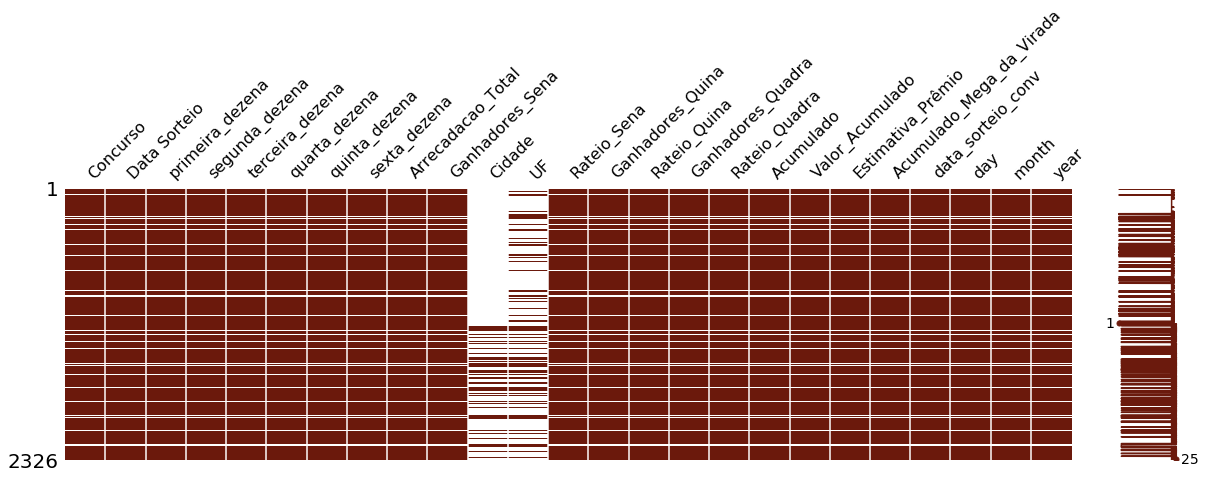

In [45]:
# Visão geral do dataframe
msno.matrix(df=df.iloc[:,0:df.shape[1]], figsize=(20, 5), color=(0.42, 0.1, 0.05))

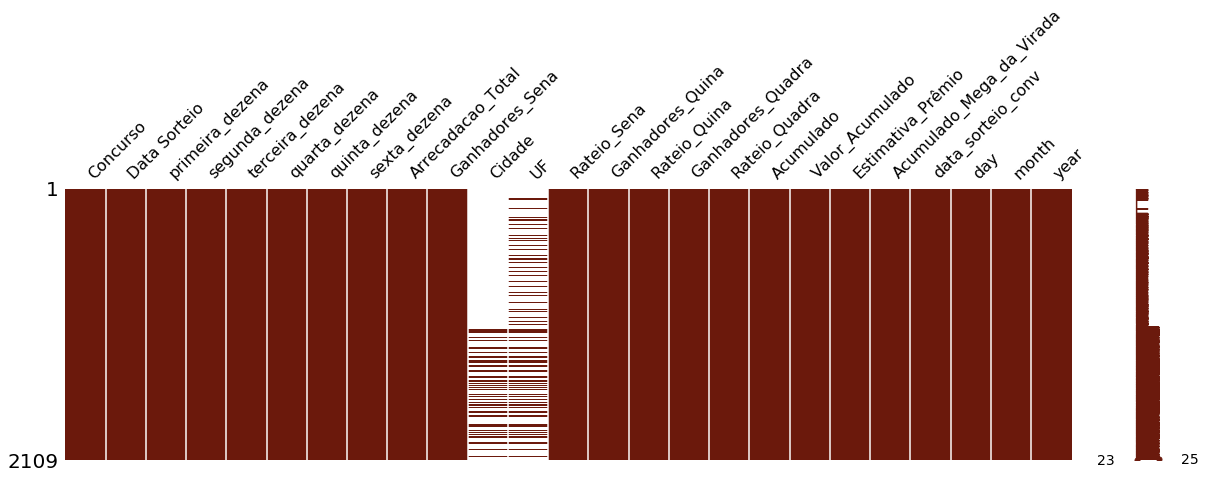

In [46]:
# Removendo valores nulos 
df = df.dropna(subset=['Concurso'])
msno.matrix(df=df.iloc[:,0:df.shape[1]], figsize=(20, 5), color=(0.42, 0.1, 0.05))

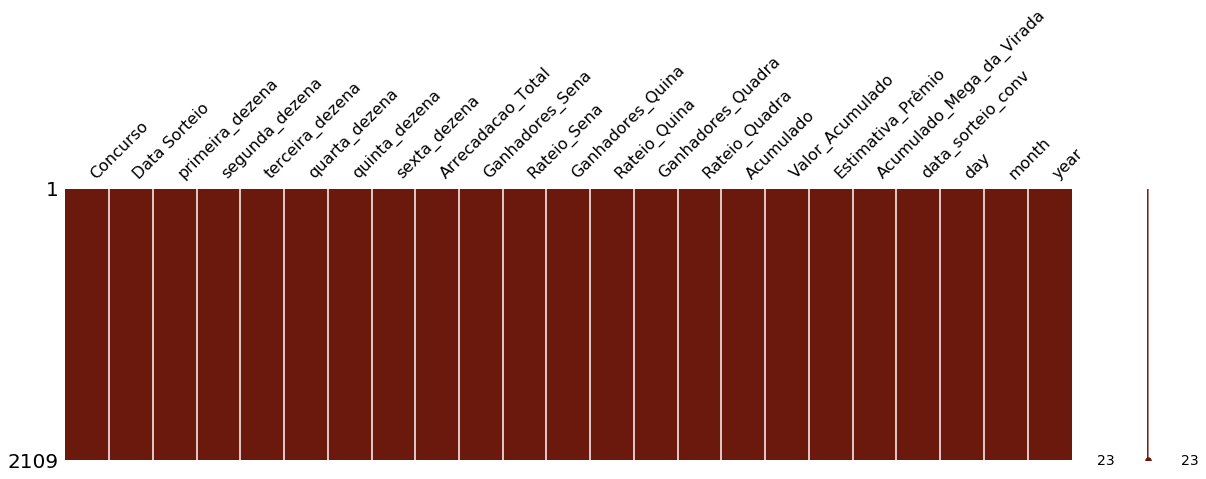

In [47]:
# Removendo colunas Cidade e UF
df = df.drop(['Cidade', 'UF'], axis=1)
msno.matrix(df=df.iloc[:,0:df.shape[1]], figsize=(20, 5), color=(0.42, 0.1, 0.05))

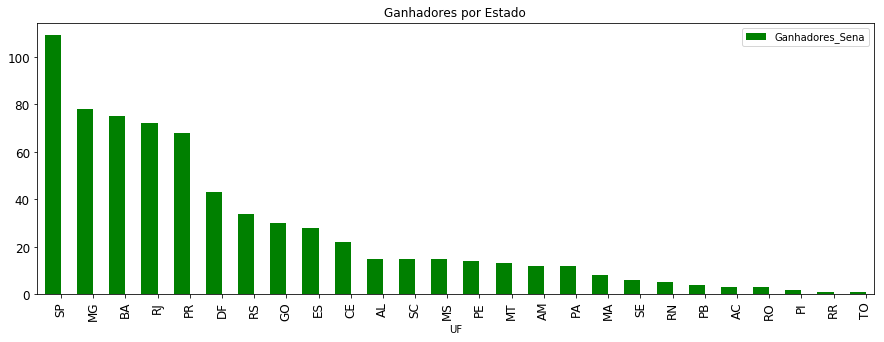

In [48]:
# Ganhadores X Volume do Prêmio por Estado 

ax = df_ganhadores.groupby(['UF'])['Ganhadores_Sena'].agg('sum').sort_values(ascending=False).plot(kind='bar', title='Ganhadores por Estado', figsize=(15,5), fontsize=12, legend=True, position=1, color='green')

#df_ganhadores.groupby(['UF'])['Rateio_Sena'].agg('sum').sort_values(ascending=False).plot(kind='bar', ax=ax, secondary_y=True, legend=True, position=0, color='blue')



In [49]:
#df_ganhadores['Rateio_Sena'] = pd.to_numeric(df['Rateio_Sena'])
#ax = df_ganhadores.groupby(['UF'])['Rateio_Sena'].agg('sum').sort_values(ascending=False).plot(kind='bar', title='Ganhadores por Estado', figsize=(15,5), fontsize=12, legend=True, position=1, color='green')

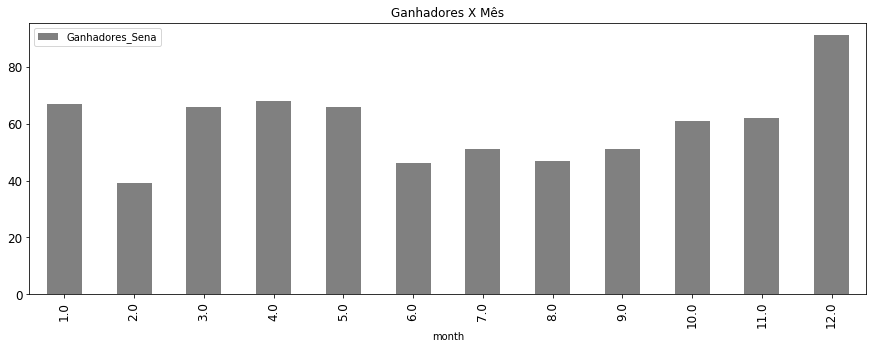

In [50]:
# Ganhadores X Mes

df_ganhadores.groupby(['month'])['Ganhadores_Sena'].agg('sum').plot(kind='bar', title='Ganhadores X Mês', fontsize=12, figsize=(15,5), legend=True, color='gray')

## Analisando dezenas sorteadas

In [51]:
# Verificando se alguma vez as dezenas se repetiram na mesma ordem
df.groupby(['primeira_dezena','segunda_dezena', 'terceira_dezena', 'quarta_dezena', 'quinta_dezena', 'sexta_dezena']).size().sort_values(ascending=False)

primeira_dezena  segunda_dezena  terceira_dezena  quarta_dezena  quinta_dezena  sexta_dezena
60.0             58.0            49.0             32.0           20.0           34.0            1
20.0             43.0            33.0             13.0           15.0           58.0            1
                 47.0            23.0             32.0           16.0           11.0            1
                 50.0            48.0             59.0           28.0           21.0            1
                 51.0            42.0             3.0            52.0           46.0            1
                                 57.0             45.0           24.0           18.0            1
                 52.0            60.0             42.0           54.0           40.0            1
                 53.0            47.0             50.0           22.0           27.0            1
                 54.0            58.0             26.0           41.0           46.0            1
                 58.0    

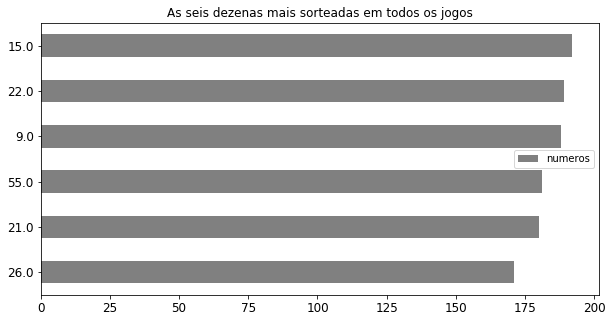

In [52]:
# As seis dezenas mais sorteadas em todos os jogos

dezenas = pd.DataFrame(df['primeira_dezena'].tolist() + df['segunda_dezena'].tolist() + df['terceira_dezena'].tolist() + df['quarta_dezena'].tolist() + df['quinta_dezena'].tolist() + df['sexta_dezena'].tolist(), columns=['numeros'])

dezenas['numeros'].value_counts().sort_values(ascending=True).head(6).plot(kind='barh', title='As seis dezenas mais sorteadas em todos os jogos', figsize=(10,5), fontsize=12, legend=True, color='gray')

In [53]:
# Criando dataframe que vamos usar nos modelos 
df_nn = df[['primeira_dezena','segunda_dezena','terceira_dezena','quarta_dezena','quinta_dezena','sexta_dezena', 'Ganhadores_Sena']] 

# Deixando os nomes das coluna em minusculo
df_nn.columns = map(str.lower, df_nn.columns)

df_nn.head(5)

,primeira_dezena,segunda_dezena,terceira_dezena,quarta_dezena,quinta_dezena,sexta_dezena,ganhadores_sena
0,41.0,5.0,4.0,52.0,30.0,33.0,0.0
1,9.0,39.0,37.0,49.0,43.0,41.0,1.0
2,36.0,30.0,10.0,11.0,29.0,47.0,2.0
4,6.0,59.0,42.0,27.0,1.0,5.0,0.0
5,1.0,19.0,46.0,6.0,16.0,2.0,0.0


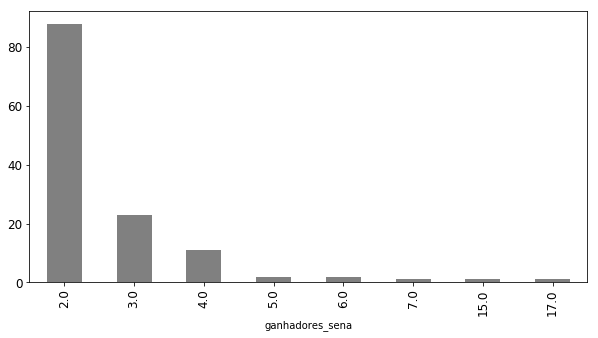

In [54]:

# Pode existir mais de um ganhador por jogo
df_nn[df_nn['ganhadores_sena'] > 1].groupby('ganhadores_sena')['ganhadores_sena'].agg('count').plot(kind='bar',figsize=(10,5), color='gray', fontsize=12)

/home/pereira/anaconda3/envs/rede-neural-megasena/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/home/pereira/anaconda3/envs/rede-neural-megasena/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


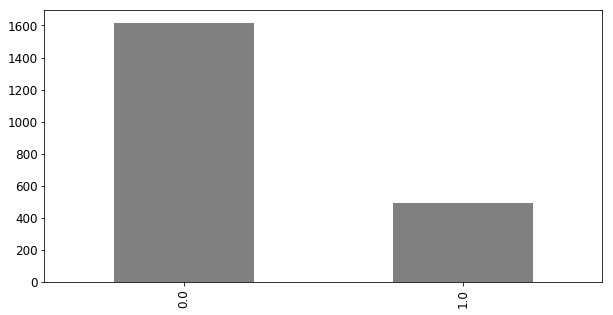

In [55]:
# Então tudo jogo que tiver mais de um ganhador deixamos como o numeor 1
df_nn.loc[df_nn['ganhadores_sena'] > 1, 'ganhadores_sena'] = 1

df_nn['ganhadores_sena'].value_counts().plot(kind='bar', figsize=(10,5), color='gray', fontsize=12)

# Primeira Rede Neural

In [56]:
from keras.models  import Sequential
from keras.layers  import Dense
from sklearn.model_selection import train_test_split

In [57]:
# Definição do seed para a reproducidade do modelo
np.random.seed(8)

In [58]:
# Separando target e classes
features = df_nn.iloc[:,0:6]
target   = df_nn.iloc[:,6]

In [59]:
# Dividindo dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(target, features, test_size=0.33, random_state=8)

In [60]:
# Criando modelo
modelo = Sequential()
modelo.add(Dense(10, input_dim=6, activation='relu'))
modelo.add(Dense(12, activation='relu'))
modelo.add(Dense(1, activation='sigmoid'))

In [61]:
# Compilando o modelo
modelo.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [62]:
# Treinando modelo
modelo.fit(y_train, X_train, epochs=300, batch_size=10)

Epoch 1/300
1413/1413 [==============================] - 0s 289us/step - loss: 1.2472 - acc: 0.6914
Epoch 2/300
1413/1413 [==============================] - 0s 121us/step - loss: 0.7534 - acc: 0.6999
Epoch 3/300
1413/1413 [==============================] - 0s 124us/step - loss: 0.6347 - acc: 0.7325
Epoch 4/300
1413/1413 [==============================] - 0s 119us/step - loss: 0.5864 - acc: 0.7643
Epoch 5/300
1413/1413 [==============================] - 0s 235us/step - loss: 0.5638 - acc: 0.7672
Epoch 6/300
1413/1413 [==============================] - 0s 154us/step - loss: 0.5585 - acc: 0.7636
Epoch 7/300
1413/1413 [==============================] - 0s 172us/step - loss: 0.5411 - acc: 0.7721
Epoch 8/300
1413/1413 [==============================] - 0s 186us/step - loss: 0.5410 - acc: 0.7721
Epoch 9/300
1413/1413 [==============================] - 0s 174us/step - loss: 0.5380 - acc: 0.7714
Epoch 10/300
1413/1413 [==============================] - 0s 211us/step - loss: 0.5373 - acc: 0.7771

1413/1413 [==============================] - 0s 113us/step - loss: 0.5116 - acc: 0.7841
Epoch 83/300
1413/1413 [==============================] - 0s 103us/step - loss: 0.5091 - acc: 0.7884
Epoch 84/300
1413/1413 [==============================] - 0s 111us/step - loss: 0.5089 - acc: 0.7827
Epoch 85/300
1413/1413 [==============================] - 0s 108us/step - loss: 0.5060 - acc: 0.7820
Epoch 86/300
1413/1413 [==============================] - 0s 110us/step - loss: 0.5078 - acc: 0.7856
Epoch 87/300
1413/1413 [==============================] - 0s 104us/step - loss: 0.5146 - acc: 0.7898
Epoch 88/300
1413/1413 [==============================] - 0s 107us/step - loss: 0.5152 - acc: 0.7820
Epoch 89/300
1413/1413 [==============================] - 0s 105us/step - loss: 0.5064 - acc: 0.7820
Epoch 90/300
1413/1413 [==============================] - 0s 110us/step - loss: 0.5098 - acc: 0.7849
Epoch 91/300
1413/1413 [==============================] - 0s 101us/step - loss: 0.5080 - acc: 0.7849
Epo

1413/1413 [==============================] - 0s 118us/step - loss: 0.4998 - acc: 0.7834
Epoch 163/300
1413/1413 [==============================] - 0s 105us/step - loss: 0.5018 - acc: 0.7884
Epoch 164/300
1413/1413 [==============================] - 0s 104us/step - loss: 0.5026 - acc: 0.7827
Epoch 165/300
1413/1413 [==============================] - 0s 110us/step - loss: 0.5028 - acc: 0.7834
Epoch 166/300
1413/1413 [==============================] - 0s 106us/step - loss: 0.5009 - acc: 0.7841
Epoch 167/300
1413/1413 [==============================] - 0s 102us/step - loss: 0.4996 - acc: 0.7841
Epoch 168/300
1413/1413 [==============================] - 0s 108us/step - loss: 0.4983 - acc: 0.7863
Epoch 169/300
1413/1413 [==============================] - 0s 103us/step - loss: 0.4989 - acc: 0.7856
Epoch 170/300
1413/1413 [==============================] - 0s 107us/step - loss: 0.5034 - acc: 0.7877
Epoch 171/300
1413/1413 [==============================] - 0s 115us/step - loss: 0.5020 - acc: 0

1413/1413 [==============================] - 0s 113us/step - loss: 0.4895 - acc: 0.7941
Epoch 243/300
1413/1413 [==============================] - 0s 101us/step - loss: 0.4880 - acc: 0.7863
Epoch 244/300
1413/1413 [==============================] - 0s 112us/step - loss: 0.4897 - acc: 0.7877
Epoch 245/300
1413/1413 [==============================] - 0s 101us/step - loss: 0.4957 - acc: 0.7891
Epoch 246/300
1413/1413 [==============================] - 0s 107us/step - loss: 0.4957 - acc: 0.7849
Epoch 247/300
1413/1413 [==============================] - 0s 102us/step - loss: 0.4921 - acc: 0.7891
Epoch 248/300
1413/1413 [==============================] - 0s 116us/step - loss: 0.4922 - acc: 0.7898
Epoch 249/300
1413/1413 [==============================] - 0s 104us/step - loss: 0.4943 - acc: 0.7856
Epoch 250/300
1413/1413 [==============================] - 0s 107us/step - loss: 0.4926 - acc: 0.7898
Epoch 251/300
1413/1413 [==============================] - 0s 105us/step - loss: 0.4936 - acc: 0

In [63]:
# Avaliando modelo
scores = modelo.evaluate(y_test, X_test)
print("\n")
print("Acuracia do modelo")
print("\n%s: %2f%%" % (modelo.metrics_names[1], scores[1]*100))

696/696 [==============================] - 0s 90us/step


Acuracia do modelo

acc: 72.988506%


## Predict

In [64]:
numero_sorteio = [[3,6,11,27,28,46]]

numero_sorteio = [[7, 14, 47, 54,56, 60]]

y_predict = pd.DataFrame(numero_sorteio)
y_predict

,0,1,2,3,4,5
0,7,14,47,54,56,60


In [65]:
# Fazendo a predição - Classes
predict_class = modelo.predict_classes(y_predict)
print("1 = Tem chance de ganhar / 0 = Não tem chance de ganhar")
print("\n")
print("Previsão Modelo: ",predict_class[0][0])

1 = Tem chance de ganhar / 0 = Não tem chance de ganhar


Previsão Modelo:  0


In [66]:
# Achando a probabilidade - Proba
predict_proba = modelo.predict_proba(y_predict)
print("Qual a probabilidade do número sair?")
print("\n")
print("Probabilidade: ", round((predict_proba[0][0]*100),2), "%")

Qual a probabilidade do número sair?


Probabilidade:  30.92 %


## Gerando numero Mega Sena

In [67]:
import random

In [68]:
random.seed(60)

In [72]:
for i in range(1,11):
    probabilidade_boa   = 99
    probabilidade_atual = 0

    # Gerando list com as dezenas sorteadas
    dezenas_sorteadas = df_nn[['primeira_dezena','segunda_dezena', 'terceira_dezena', 'quarta_dezena', 'quinta_dezena', 'sexta_dezena']].values.tolist()

    # Gera sequencia de numeros até que a probabilidade seja maior ou igual que 99%
    while(probabilidade_atual < probabilidade_boa):
    
        # Gera sequencia de número 
        dezenas_megasena = random.sample(range(1, 60), 6)
    
        # Numero gerado já foi sorteado?
        if not dezenas_megasena in dezenas_sorteadas:

            # Valida qual a probabilidade da seguência ser sorteada
            probabilidade_atual = int(modelo.predict_proba(pd.DataFrame([dezenas_megasena]))[0][0]*100)
    

    print("Probabilidade de {0} % -> Dezenas: {1}".format(probabilidade_atual, sorted(dezenas_megasena)))

Probabilidade de 99 % -> Dezenas: [6, 8, 14, 33, 50, 56]
Probabilidade de 99 % -> Dezenas: [1, 4, 8, 17, 40, 55]
Probabilidade de 100 % -> Dezenas: [1, 9, 12, 14, 17, 44]
Probabilidade de 99 % -> Dezenas: [2, 13, 18, 19, 23, 50]
Probabilidade de 99 % -> Dezenas: [1, 7, 15, 49, 57, 59]
Probabilidade de 99 % -> Dezenas: [3, 9, 11, 29, 54, 58]
Probabilidade de 99 % -> Dezenas: [1, 5, 7, 32, 50, 55]
Probabilidade de 99 % -> Dezenas: [5, 10, 12, 31, 50, 56]
Probabilidade de 100 % -> Dezenas: [3, 8, 14, 50, 56, 58]
Probabilidade de 99 % -> Dezenas: [3, 4, 12, 21, 51, 57]
